**Kütüphaneler ve Veri Setimizi Yüklüyoruz**

In [16]:
# Kütüphaneleri yükleme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV dosyasını okuma jupyter notebook için
df = pd.read_csv('C:/Users/Vektorel/Desktop/müsteri_veriseti.csv')
print("Orijinal veri:")
print(df)


Orijinal veri:
    musteri_id   yas    isim_soyisim       sehir cinsiyet  \
0       100001   NaN     Ayşe Yılmaz    İstanbul    Kadın   
1       100002  52.0    Mehmet Demir      Ankara    Erkek   
2       100003  28.0      Fatma Kaya       İzmir    Kadın   
3       100004  45.0       Ali Şahin       Bursa    Erkek   
4       100005  61.0    Zeynep Çelik     Antalya    Kadın   
..         ...   ...             ...         ...      ...   
95      100096  34.0     Poyraz Özer       Adana    Erkek   
96      100097  46.0   Reyhan Korkut       Konya    Kadın   
97      100098  68.0  Süleyman Şahin   Gaziantep    Erkek   
98      100099  32.0   Şermin Arıkan   Şanlıurfa    Kadın   
99      100100  58.0    Tuncay Duran  Diyarbakır    Erkek   

          uyelik_tarihi  siparis_adeti  toplam_odeme odeme_sekli  \
0   2022-10-26 14:30:00              5       1250.50       Peşin   
1   2021-05-18 09:15:00             12       5400.75    Taksitli   
2   2023-01-10 16:45:00              2        30

In [18]:
# Sütun isimlerini yazdır
print("Mevcut sütun isimleri:")
print(df.columns)

# Eksik veri kontrolü ve doldurma
print("\nEksik veriler:")
print(df.isnull().sum())

#Eksik verileri ortalama ile dolduralım.
yas_ortalamasi = df['yas'].mean()
df['yas'] = df['yas'].fillna(yas_ortalamasi)
df['yas'] = df['yas'].astype(int)

#Eksik veri kontrolünü tekrar yapalım
print("\nEksik veri doldurulmuş hali:")
print(df.isnull().sum())

print(df.head())


#Temel analiz
toplam_odeme_ortalamasi = df['toplam_odeme'].mean()
toplam_odeme_std = df['toplam_odeme'].std()
print(f"\nMüşterilerin Ödeme ortalaması: {toplam_odeme_ortalamasi}, Standart sapma: {toplam_odeme_std}")


Mevcut sütun isimleri:
Index(['musteri_id', 'yas', 'isim_soyisim', 'sehir', 'cinsiyet',
       'uyelik_tarihi', 'siparis_adeti', 'toplam_odeme', 'odeme_sekli',
       'odeme_yontemi', 'urun_kategori'],
      dtype='object')

Eksik veriler:
musteri_id       0
yas              9
isim_soyisim     0
sehir            0
cinsiyet         0
uyelik_tarihi    0
siparis_adeti    0
toplam_odeme     0
odeme_sekli      0
odeme_yontemi    0
urun_kategori    0
dtype: int64

Eksik veri doldurulmuş hali:
musteri_id       0
yas              0
isim_soyisim     0
sehir            0
cinsiyet         0
uyelik_tarihi    0
siparis_adeti    0
toplam_odeme     0
odeme_sekli      0
odeme_yontemi    0
urun_kategori    0
dtype: int64
   musteri_id  yas  isim_soyisim     sehir cinsiyet        uyelik_tarihi  \
0      100001   45   Ayşe Yılmaz  İstanbul    Kadın  2022-10-26 14:30:00   
1      100002   52  Mehmet Demir    Ankara    Erkek  2021-05-18 09:15:00   
2      100003   28    Fatma Kaya     İzmir    Kadın  2023-

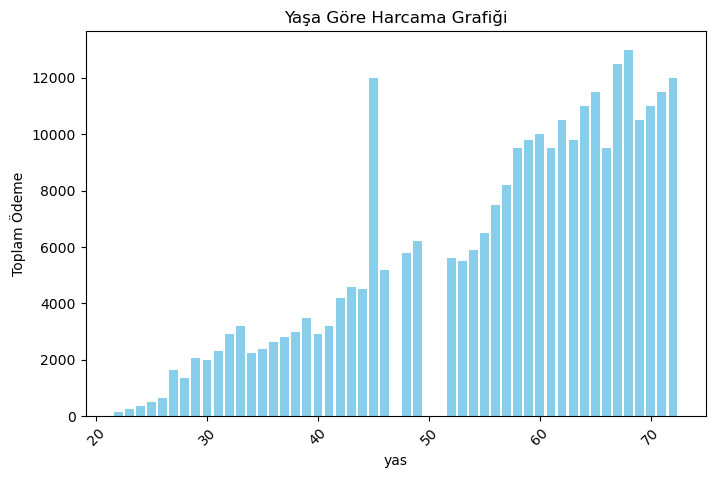

C:\Users\Vektorel\AppData\Local\Temp\ipykernel_11956\3147284147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cinsiyet', y='toplam_odeme', data=df, palette='pastel')


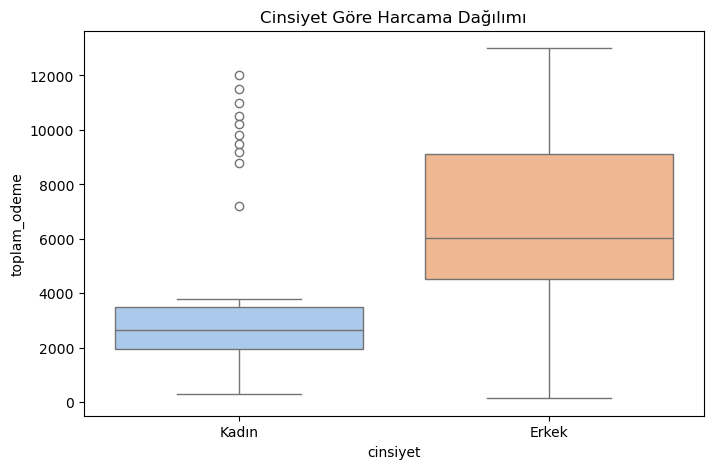

In [22]:

# Matplotlib ile çubuk grafik
plt.figure(figsize=(8, 5))
plt.bar(df['yas'], df['toplam_odeme'], color='skyblue')
plt.title('Yaşa Göre Harcama Grafiği')
plt.xlabel('yas')
plt.ylabel('Toplam Ödeme')
plt.xticks(rotation=45)
plt.show()

# Seaborn ile kutu grafiği (cinsiyete göre not dağılımı)
plt.figure(figsize=(8, 5))
sns.boxplot(x='cinsiyet', y='toplam_odeme', data=df, palette='pastel')
plt.title('Cinsiyet Göre Harcama Dağılımı')
plt.show()

C:\Users\Vektorel\AppData\Local\Temp\ipykernel_11956\532038837.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yas_urun_count = df.groupby(['yas_grubu', 'urun_kategori']).size().unstack()


<Figure size 1200x800 with 0 Axes>

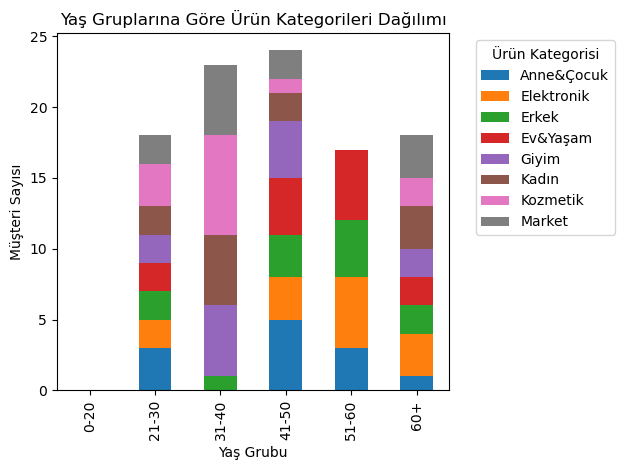

In [32]:
# Yaş grupları oluşturma
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']
df['yas_grubu'] = pd.cut(df['yas'], bins=bins, labels=labels)
    
# Yaş gruplarına göre ürün kategorilerinin dağılımını görselleştirme
plt.figure(figsize=(12, 8))
yas_urun_count = df.groupby(['yas_grubu', 'urun_kategori']).size().unstack()
yas_urun_count.plot(kind='bar', stacked=True)
plt.title('Yaş Gruplarına Göre Ürün Kategorileri Dağılımı')
plt.xlabel('Yaş Grubu')
plt.ylabel('Müşteri Sayısı')
plt.legend(title='Ürün Kategorisi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
  

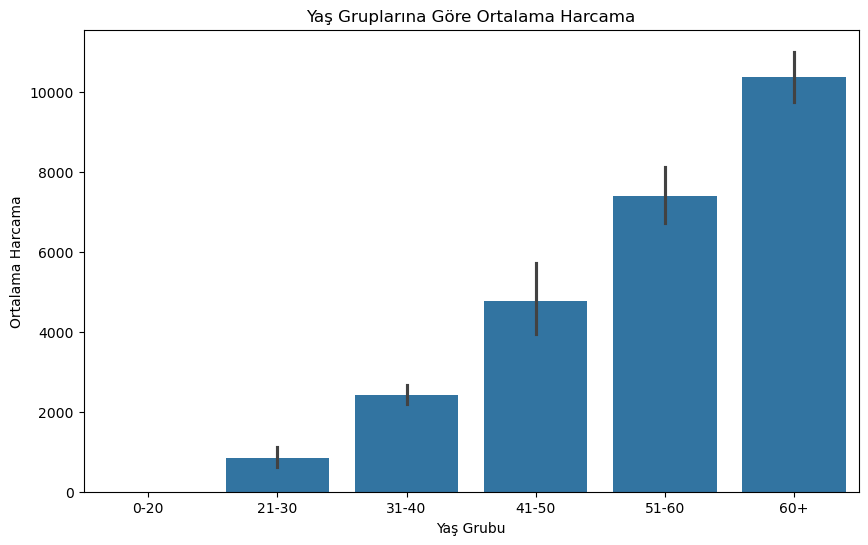

In [34]:
 
# Her yaş grubu için ortalama harcamaları gösterme
plt.figure(figsize=(10, 6))
sns.barplot(x='yas_grubu', y='toplam_odeme', data=df)
plt.title('Yaş Gruplarına Göre Ortalama Harcama')
plt.xlabel('Yaş Grubu')
plt.ylabel('Ortalama Harcama')
plt.show()
    

C:\Users\Vektorel\AppData\Local\Temp\ipykernel_11956\1498823097.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(


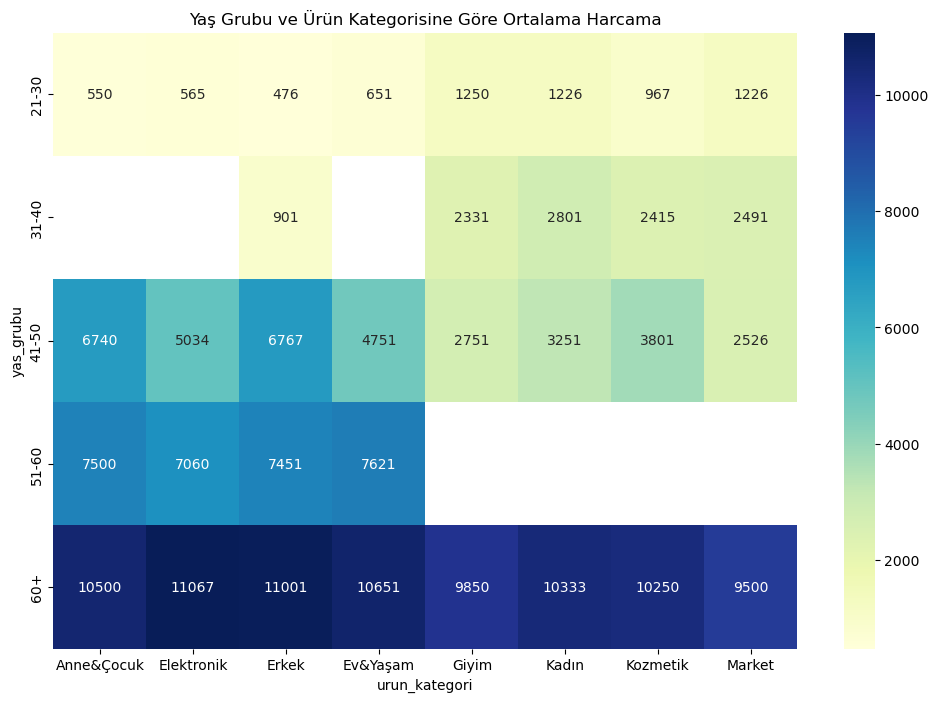

In [36]:
# Isı haritası: Yaş grupları ve ürün kategorilerine göre ortalama harcama
plt.figure(figsize=(12, 8))
heatmap_data = df.pivot_table(
    values='toplam_odeme', 
    index='yas_grubu', 
    columns='urun_kategori', 
    aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Yaş Grubu ve Ürün Kategorisine Göre Ortalama Harcama')
plt.show()

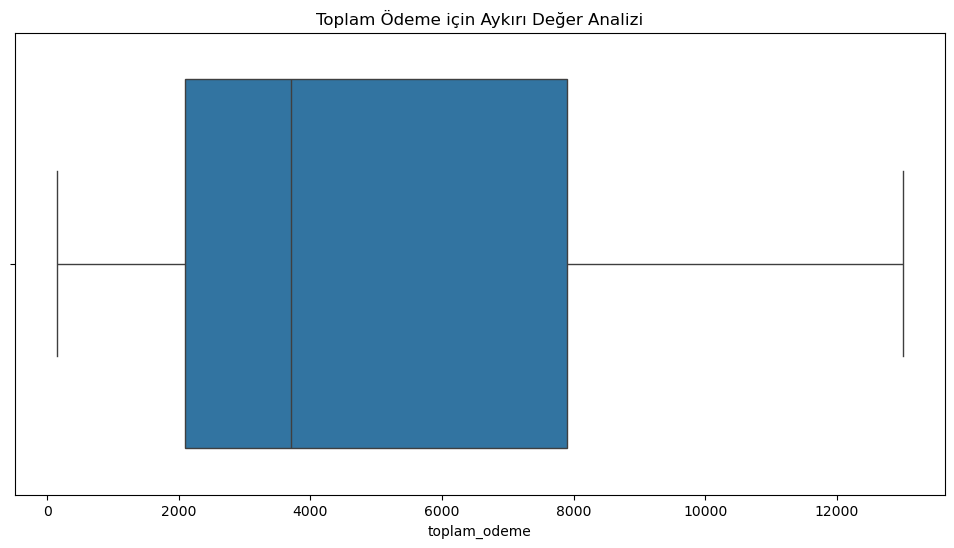


Tüm sayısal değişkenlerin özeti:
          musteri_id         yas  siparis_adeti  toplam_odeme
count     100.000000  100.000000     100.000000    100.000000
mean   100050.500000   45.110000      12.850000   4981.329500
std        29.011492   13.797156       6.328347   3618.064297
min    100001.000000   22.000000       1.000000    150.800000
25%    100025.750000   33.000000       8.000000   2087.975000
50%    100050.500000   45.000000      12.000000   3700.750000
75%    100075.250000   57.250000      18.000000   7900.462500
max    100100.000000   72.000000      27.000000  13000.200000


In [38]:
#Aykırı değerleri tespit etme ve görselleştirme
plt.figure(figsize=(12, 6))
sns.boxplot(x='toplam_odeme', data=df)
plt.title('Toplam Ödeme için Aykırı Değer Analizi')
plt.show()

# İstatistiksel özet
print("\nTüm sayısal değişkenlerin özeti:")
print(df.describe())


Müşteri Ödeme Segmentleri:
odeme_segmenti
Orta      34
Düşük     33
Yüksek    33
Name: count, dtype: int64

Ödeme segmentlerine göre yaş ortalaması:
odeme_segmenti
Düşük     30.818182
Orta      43.558824
Yüksek    61.000000
Name: yas, dtype: float64


C:\Users\Vektorel\AppData\Local\Temp\ipykernel_11956\1846029827.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('odeme_segmenti')['yas'].mean())


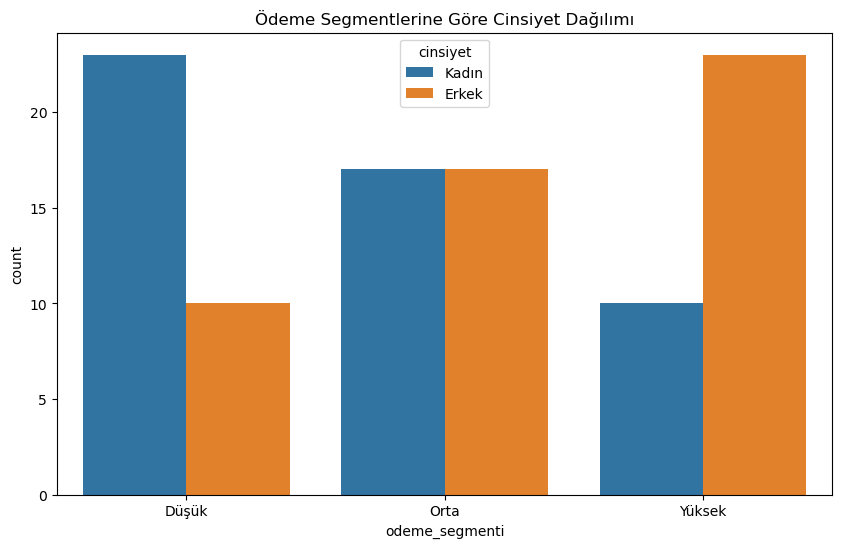

In [40]:
# Eğer müşteri segmentasyonu yapmak isterseniz:
# Basit bir örnek: Toplam ödemeye göre müşterileri segmentlere ayırma
if 'toplam_odeme' in df.columns:
    q_labels = ['Düşük', 'Orta', 'Yüksek']
    df['odeme_segmenti'] = pd.qcut(df['toplam_odeme'], q=3, labels=q_labels)
    
    print("\nMüşteri Ödeme Segmentleri:")
    print(df['odeme_segmenti'].value_counts())
    
    # Segmentlere göre yaş ortalaması
    print("\nÖdeme segmentlerine göre yaş ortalaması:")
    print(df.groupby('odeme_segmenti')['yas'].mean())
    
    # Görselleştirme
    plt.figure(figsize=(10, 6))
    sns.countplot(x='odeme_segmenti', hue='cinsiyet', data=df)
    plt.title('Ödeme Segmentlerine Göre Cinsiyet Dağılımı')
    plt.show()